<html> <h1 style="font-style:bold; color:blue;"> Machine Learning in Finance </h1> </html>

## Install Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import random

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')


In [3]:
#Load data
df_2023_Ask = pd.read_csv("/content/aa.csv")
df_2023_Bid = pd.read_csv("/content/bb.csv")

In [4]:
print(df_2023_Ask.head(3))
print(df_2023_Ask.tail(3))

            Time (UTC)      Open      High       Low     Close  Volume
0  01.01.2024 00:00:00  2063.112  2063.112  2063.112  2063.112     0.0
1  01.01.2024 00:01:00  2063.112  2063.112  2063.112  2063.112     0.0
2  01.01.2024 00:02:00  2063.112  2063.112  2063.112  2063.112     0.0
                 Time (UTC)      Open      High       Low     Close  Volume
482397  30.11.2024 23:57:00  2650.422  2650.422  2650.422  2650.422     0.0
482398  30.11.2024 23:58:00  2650.422  2650.422  2650.422  2650.422     0.0
482399  30.11.2024 23:59:00  2650.422  2650.422  2650.422  2650.422     0.0


In [5]:
print(df_2023_Bid.head(3))
print(df_2023_Bid.tail(3))

            Time (UTC)      Open      High       Low     Close  Volume
0  01.01.2024 00:00:00  2062.688  2062.688  2062.688  2062.688     0.0
1  01.01.2024 00:01:00  2062.688  2062.688  2062.688  2062.688     0.0
2  01.01.2024 00:02:00  2062.688  2062.688  2062.688  2062.688     0.0
                 Time (UTC)      Open      High       Low     Close  Volume
482397  30.11.2024 23:57:00  2649.945  2649.945  2649.945  2649.945     0.0
482398  30.11.2024 23:58:00  2649.945  2649.945  2649.945  2649.945     0.0
482399  30.11.2024 23:59:00  2649.945  2649.945  2649.945  2649.945     0.0


In [6]:
df_2023_Ask.head(3)

,Time (UTC),Open,High,Low,Close,Volume
0,01.01.2024 00:00:00,2063.112,2063.112,2063.112,2063.112,0.0
1,01.01.2024 00:01:00,2063.112,2063.112,2063.112,2063.112,0.0
2,01.01.2024 00:02:00,2063.112,2063.112,2063.112,2063.112,0.0


In [7]:
df_2023_Ask.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 482400 entries, 0 to 482399
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Time (UTC)  482400 non-null  object 
 1   Open        482400 non-null  float64
 2   High        482400 non-null  float64
 3   Low         482400 non-null  float64
 4   Close       482400 non-null  float64
 5   Volume      482400 non-null  float64
dtypes: float64(5), object(1)
memory usage: 22.1+ MB


In [8]:
df_2023_Bid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 482400 entries, 0 to 482399
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Time (UTC)  482400 non-null  object 
 1   Open        482400 non-null  float64
 2   High        482400 non-null  float64
 3   Low         482400 non-null  float64
 4   Close       482400 non-null  float64
 5   Volume      482400 non-null  float64
dtypes: float64(5), object(1)
memory usage: 22.1+ MB


<html> <h3 style="font-style:italic; color:blue;"> Merge DataFrame </h3> </html>

In [9]:
df_2023 = df_2023_Bid.merge(df_2023_Ask, left_on='Time (UTC)', right_on='Time (UTC)', how='outer')
df_2023

,Time (UTC),Open_x,High_x,Low_x,Close_x,Volume_x,Open_y,High_y,Low_y,Close_y,Volume_y
0,01.01.2024 00:00:00,2062.688,2062.688,2062.688,2062.688,0.0000,2063.112,2063.112,2063.112,2063.112,0.0000
1,01.01.2024 00:01:00,2062.688,2062.688,2062.688,2062.688,0.0000,2063.112,2063.112,2063.112,2063.112,0.0000
2,01.01.2024 00:02:00,2062.688,2062.688,2062.688,2062.688,0.0000,2063.112,2063.112,2063.112,2063.112,0.0000
3,01.01.2024 00:03:00,2062.688,2062.688,2062.688,2062.688,0.0000,2063.112,2063.112,2063.112,2063.112,0.0000
4,01.01.2024 00:04:00,2062.688,2062.688,2062.688,2062.688,0.0000,2063.112,2063.112,2063.112,2063.112,0.0000
...,...,...,...,...,...,...,...,...,...,...,...
482515,31.10.2024 23:55:00,2746.315,2746.355,2746.245,2746.325,4800.0002,2746.695,2746.785,2746.655,2746.745,17670.0000
482516,31.10.2024 23:56:00,2746.325,2746.455,2746.165,2746.165,9390.0003,2746.715,2746.855,2746.545,2746.545,32430.0006
482517,31.10.2024 23:57:00,2746.135,2746.145,2745.905,2746.135,8940.0001,2746.485,2746.575,2746.275,2746.555,30060.0007
482518,31.10.2024 23:58:00,2746.155,2746.645,2746.125,2746.645,10649.9996,2746.555,2747.105,2746.545,2747.045,34860.0000


In [10]:
df_2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 482520 entries, 0 to 482519
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Time (UTC)  482520 non-null  object 
 1   Open_x      482520 non-null  float64
 2   High_x      482520 non-null  float64
 3   Low_x       482520 non-null  float64
 4   Close_x     482520 non-null  float64
 5   Volume_x    482520 non-null  float64
 6   Open_y      482520 non-null  float64
 7   High_y      482520 non-null  float64
 8   Low_y       482520 non-null  float64
 9   Close_y     482520 non-null  float64
 10  Volume_y    482520 non-null  float64
dtypes: float64(10), object(1)
memory usage: 40.5+ MB


In [11]:
# rename columns

df_2023.columns = ['Local time', 'Open_Bid', 'High_Bid', 'Low_Bid', 'Close_Bid', 'Volume_Bid',
                   'Open_Ask', 'High_Ask', 'Low_Ask', 'Close_Ask', 'Volume_Ask']

In [12]:
df_2023.head()

,Local time,Open_Bid,High_Bid,Low_Bid,Close_Bid,Volume_Bid,Open_Ask,High_Ask,Low_Ask,Close_Ask,Volume_Ask
0,01.01.2024 00:00:00,2062.688,2062.688,2062.688,2062.688,0.0,2063.112,2063.112,2063.112,2063.112,0.0
1,01.01.2024 00:01:00,2062.688,2062.688,2062.688,2062.688,0.0,2063.112,2063.112,2063.112,2063.112,0.0
2,01.01.2024 00:02:00,2062.688,2062.688,2062.688,2062.688,0.0,2063.112,2063.112,2063.112,2063.112,0.0
3,01.01.2024 00:03:00,2062.688,2062.688,2062.688,2062.688,0.0,2063.112,2063.112,2063.112,2063.112,0.0
4,01.01.2024 00:04:00,2062.688,2062.688,2062.688,2062.688,0.0,2063.112,2063.112,2063.112,2063.112,0.0


In [13]:
df_2023.tail()

,Local time,Open_Bid,High_Bid,Low_Bid,Close_Bid,Volume_Bid,Open_Ask,High_Ask,Low_Ask,Close_Ask,Volume_Ask
482515,31.10.2024 23:55:00,2746.315,2746.355,2746.245,2746.325,4800.0002,2746.695,2746.785,2746.655,2746.745,17670.0000
482516,31.10.2024 23:56:00,2746.325,2746.455,2746.165,2746.165,9390.0003,2746.715,2746.855,2746.545,2746.545,32430.0006
482517,31.10.2024 23:57:00,2746.135,2746.145,2745.905,2746.135,8940.0001,2746.485,2746.575,2746.275,2746.555,30060.0007
482518,31.10.2024 23:58:00,2746.155,2746.645,2746.125,2746.645,10649.9996,2746.555,2747.105,2746.545,2747.045,34860.0000
482519,31.10.2024 23:59:00,2746.645,2746.685,2746.495,2746.545,8759.9996,2747.085,2747.135,2746.955,2746.965,24299.9997


In [14]:
#save file
file_obj2 = open('df_2023.csv', 'w')
df_2023.to_csv('df_2023.csv', encoding='utf-8', index=False)
file_obj2.close()

In [15]:
df_2023 = []

df_2023

[]

In [16]:
df = pd.read_csv('df_2023.csv', low_memory=False, sep=',')

In [17]:

df["Volume_Delta"] = df["Volume_Ask"] - df["Volume_Bid"]
df["Volume_Delta_abs"] = (df["Volume_Ask"] - df["Volume_Bid"]).abs()

In [18]:
df["Open_Delta"] = df["Open_Ask"]  - df["Open_Bid"]
df["High_Delta"] = df["High_Ask"]  - df["High_Bid"]
df["Low_Delta"]  = df["Low_Ask"]   - df["Low_Bid"]
df["Close_Delta"]= df["Close_Ask"] - df["Close_Bid"]

In [19]:
df.describe()

,Open_Bid,High_Bid,Low_Bid,Close_Bid,Volume_Bid,Open_Ask,High_Ask,Low_Ask,Close_Ask,Volume_Ask,Volume_Delta,Volume_Delta_abs,Open_Delta,High_Delta,Low_Delta,Close_Delta
count,482520.000000,482520.000000,482520.000000,482520.000000,482520.000000,482520.000000,482520.000000,482520.000000,482520.000000,4.825200e+05,4.825200e+05,4.825200e+05,482520.000000,482520.000000,482520.000000,482520.000000
mean,2366.536896,2366.768695,2366.304156,2366.537442,25866.952705,2367.105053,2367.337488,2366.873115,2367.107251,2.592296e+04,5.600378e+01,1.659022e+04,0.568158,0.568793,0.568959,0.569809
std,219.533680,219.570130,219.496611,219.533583,36558.365061,219.570200,219.606015,219.533354,219.570377,3.640988e+04,3.004579e+04,2.505029e+04,0.379507,0.378347,0.378581,0.377672
min,1984.855000,1985.705000,1984.088000,1984.955000,0.000000,1985.205000,1986.025000,1984.475000,1985.275000,0.000000e+00,-7.671900e+05,0.000000e+00,0.001000,0.001000,0.001000,0.001000
25%,2178.965000,2179.014750,2178.965000,2178.965000,0.000000,2179.665000,2179.665000,2179.665000,2179.665000,0.000000e+00,-4.609998e+03,0.000000e+00,0.354000,0.357000,0.357000,0.360000
50%,2360.175000,2360.175000,2360.175000,2360.175000,12269.999800,2361.265000,2361.265000,2361.265000,2361.265000,1.260000e+04,0.000000e+00,5.040000e+03,0.407000,0.407000,0.407000,0.407000
75%,2516.225000,2516.455000,2515.948000,2516.225000,36109.998800,2516.605000,2516.855000,2516.335000,2516.605000,3.623000e+04,5.460000e+03,2.440000e+04,0.630000,0.630000,0.630000,0.630000
max,2789.815000,2790.005000,2789.458000,2789.755000,952740.013600,2790.085000,2790.315000,2789.852000,2790.085000,1.375510e+06,1.342750e+06,1.342750e+06,5.981000,5.981000,5.981000,5.981000


In [20]:

data = df.drop(['Open_Ask', 'High_Ask', 'Low_Ask', 'Close_Ask'], axis=1)

In [21]:
data.shape

(482520, 13)

In [22]:

data.head(3)

,Local time,Open_Bid,High_Bid,Low_Bid,Close_Bid,Volume_Bid,Volume_Ask,Volume_Delta,Volume_Delta_abs,Open_Delta,High_Delta,Low_Delta,Close_Delta
0,01.01.2024 00:00:00,2062.688,2062.688,2062.688,2062.688,0.0,0.0,0.0,0.0,0.424,0.424,0.424,0.424
1,01.01.2024 00:01:00,2062.688,2062.688,2062.688,2062.688,0.0,0.0,0.0,0.0,0.424,0.424,0.424,0.424
2,01.01.2024 00:02:00,2062.688,2062.688,2062.688,2062.688,0.0,0.0,0.0,0.0,0.424,0.424,0.424,0.424


<html> <h3 style="font-style:italic; color:blue;"> Data transformation </h3> </html>

In [23]:
data['Local_time_T'] = pd.to_datetime(data['Local time'], format='%d.%m.%Y %H:%M:%S.%f GMT%z', errors='coerce')

In [24]:
data = data.drop(['Local time'], axis=1)

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 482520 entries, 0 to 482519
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Open_Bid          482520 non-null  float64       
 1   High_Bid          482520 non-null  float64       
 2   Low_Bid           482520 non-null  float64       
 3   Close_Bid         482520 non-null  float64       
 4   Volume_Bid        482520 non-null  float64       
 5   Volume_Ask        482520 non-null  float64       
 6   Volume_Delta      482520 non-null  float64       
 7   Volume_Delta_abs  482520 non-null  float64       
 8   Open_Delta        482520 non-null  float64       
 9   High_Delta        482520 non-null  float64       
 10  Low_Delta         482520 non-null  float64       
 11  Close_Delta       482520 non-null  float64       
 12  Local_time_T      0 non-null       datetime64[ns]
dtypes: datetime64[ns](1), float64(12)
memory usage: 47.9 MB


In [26]:
data.head(3)

,Open_Bid,High_Bid,Low_Bid,Close_Bid,Volume_Bid,Volume_Ask,Volume_Delta,Volume_Delta_abs,Open_Delta,High_Delta,Low_Delta,Close_Delta,Local_time_T
0,2062.688,2062.688,2062.688,2062.688,0.0,0.0,0.0,0.0,0.424,0.424,0.424,0.424,NaT
1,2062.688,2062.688,2062.688,2062.688,0.0,0.0,0.0,0.0,0.424,0.424,0.424,0.424,NaT
2,2062.688,2062.688,2062.688,2062.688,0.0,0.0,0.0,0.0,0.424,0.424,0.424,0.424,NaT


<html> <h3 style="font-style:italic; color:blue;"> Data Visualization </h3> </html>

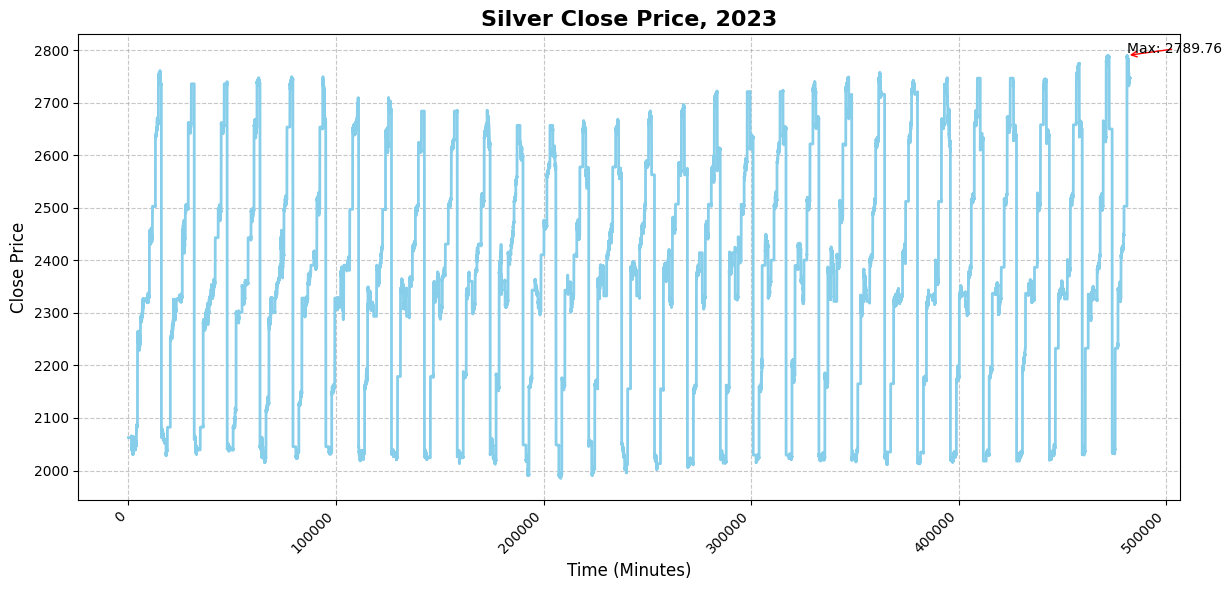

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(data['Close_Bid'], color='skyblue', linewidth=2, linestyle='-')
plt.title('Silver Close Price, 2023', fontsize=16, fontweight='bold')
plt.xlabel('Time (Minutes)', fontsize=12)
plt.ylabel('Close Price', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

max_price = data['Close_Bid'].max()
max_index = data['Close_Bid'].idxmax()
plt.annotate(f'Max: {max_price:.2f}', xy=(max_index, max_price),
             xytext=(max_index - 100, max_price + 5), arrowprops=dict(arrowstyle="->", color='red'))


plt.show()

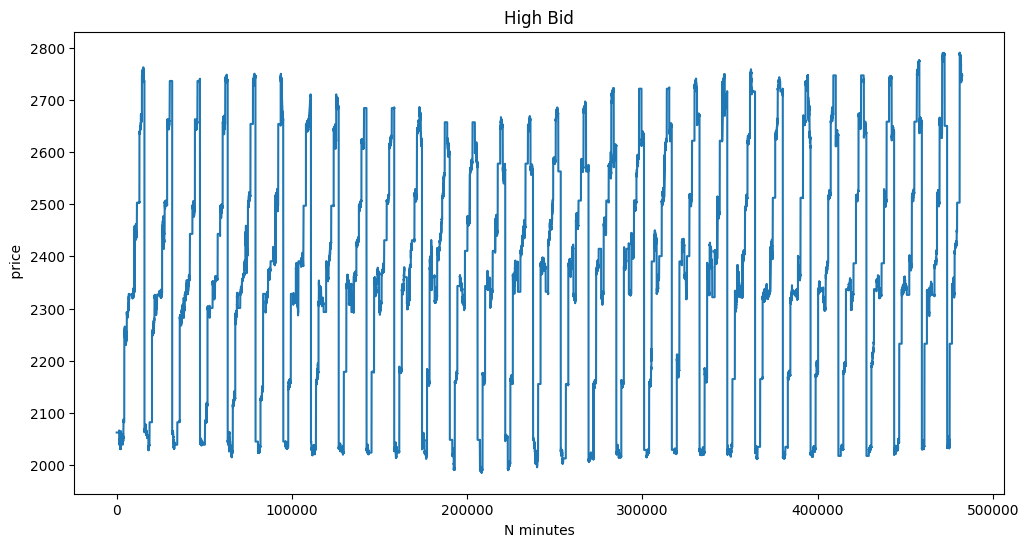

In [28]:
plt.figure(figsize=(12,6))
plt.plot(data['High_Bid'])
plt.title('High Bid')
plt.xlabel('N minutes')
plt.ylabel(' price')
plt.show()

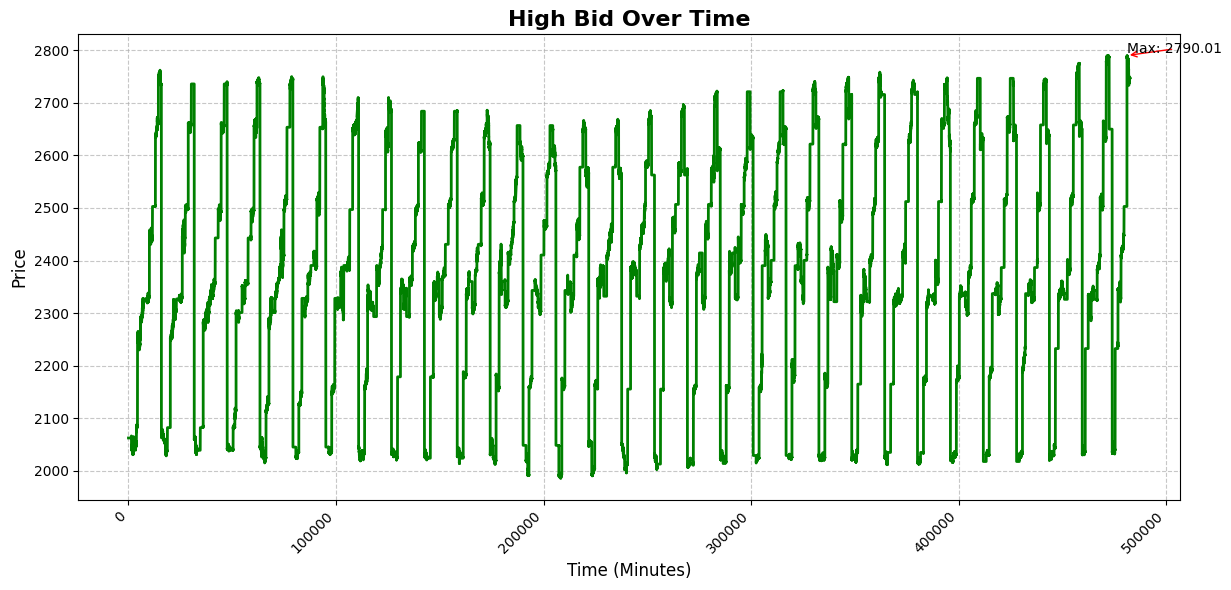

In [29]:
plt.figure(figsize=(12,6))
plt.plot(data['High_Bid'], color='green', linewidth=2, linestyle='-') # Customize line color, width, and style
plt.title('High Bid Over Time', fontsize=16, fontweight='bold') # More descriptive title
plt.xlabel('Time (Minutes)', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

max_price = data['High_Bid'].max()
max_index = data['High_Bid'].idxmax()
plt.annotate(f'Max: {max_price:.2f}', xy=(max_index, max_price),
             xytext=(max_index - 100, max_price + 5), arrowprops=dict(arrowstyle="->", color='red'))

plt.show()

In [30]:
data

,Open_Bid,High_Bid,Low_Bid,Close_Bid,Volume_Bid,Volume_Ask,Volume_Delta,Volume_Delta_abs,Open_Delta,High_Delta,Low_Delta,Close_Delta,Local_time_T
0,2062.688,2062.688,2062.688,2062.688,0.0000,0.0000,0.0000,0.0000,0.424,0.424,0.424,0.424,NaT
1,2062.688,2062.688,2062.688,2062.688,0.0000,0.0000,0.0000,0.0000,0.424,0.424,0.424,0.424,NaT
2,2062.688,2062.688,2062.688,2062.688,0.0000,0.0000,0.0000,0.0000,0.424,0.424,0.424,0.424,NaT
3,2062.688,2062.688,2062.688,2062.688,0.0000,0.0000,0.0000,0.0000,0.424,0.424,0.424,0.424,NaT
4,2062.688,2062.688,2062.688,2062.688,0.0000,0.0000,0.0000,0.0000,0.424,0.424,0.424,0.424,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...
482515,2746.315,2746.355,2746.245,2746.325,4800.0002,17670.0000,12869.9998,12869.9998,0.380,0.430,0.410,0.420,NaT
482516,2746.325,2746.455,2746.165,2746.165,9390.0003,32430.0006,23040.0003,23040.0003,0.390,0.400,0.380,0.380,NaT
482517,2746.135,2746.145,2745.905,2746.135,8940.0001,30060.0007,21120.0006,21120.0006,0.350,0.430,0.370,0.420,NaT
482518,2746.155,2746.645,2746.125,2746.645,10649.9996,34860.0000,24210.0004,24210.0004,0.400,0.460,0.420,0.400,NaT


In [31]:
data_chart = data.set_index('Local_time_T', inplace=False)

In [32]:
data_chart = data_chart.drop(['Volume_Ask', 'Volume_Delta', 'Volume_Delta_abs',
                        'Open_Delta', 'High_Delta', 'Low_Delta', 'Close_Delta'],axis=1)

In [33]:
data_chart = []

In [34]:
data['Y_High_Bid'] = data['High_Bid']
data['Y_Low_Ask'] = data['Low_Bid'] + data['Low_Delta']
data = data.drop(['Local_time_T'],axis=1)

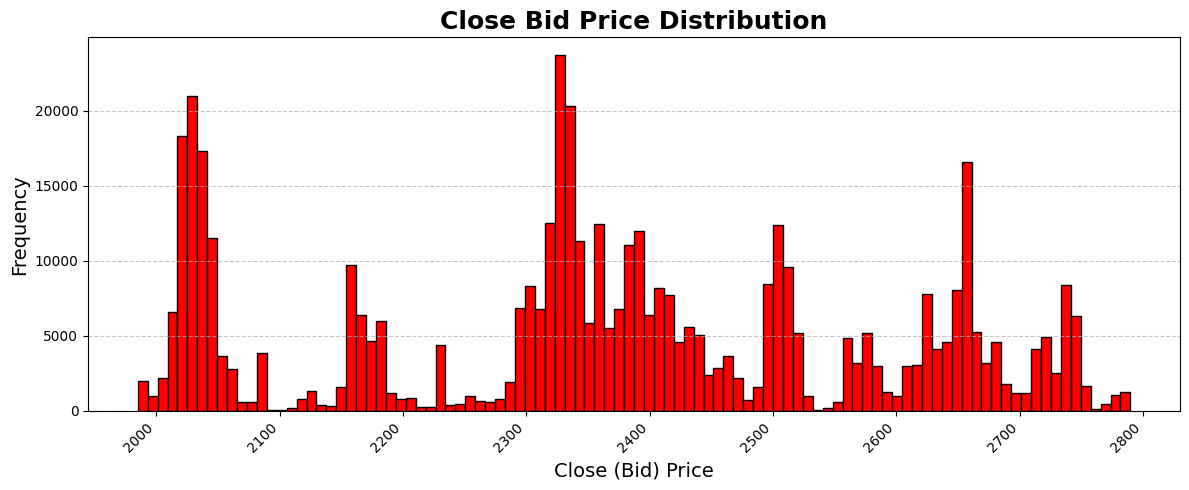

In [35]:

import matplotlib.pyplot as plt

plt.figure(num=1, figsize=(12, 5))
plt.hist(data['Close_Bid'], bins=100, color='red', edgecolor='black')
plt.title('Close Bid Price Distribution', size=18, fontweight='bold')
plt.ylabel('Frequency', size=14)
plt.xlabel('Close (Bid) Price', size=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

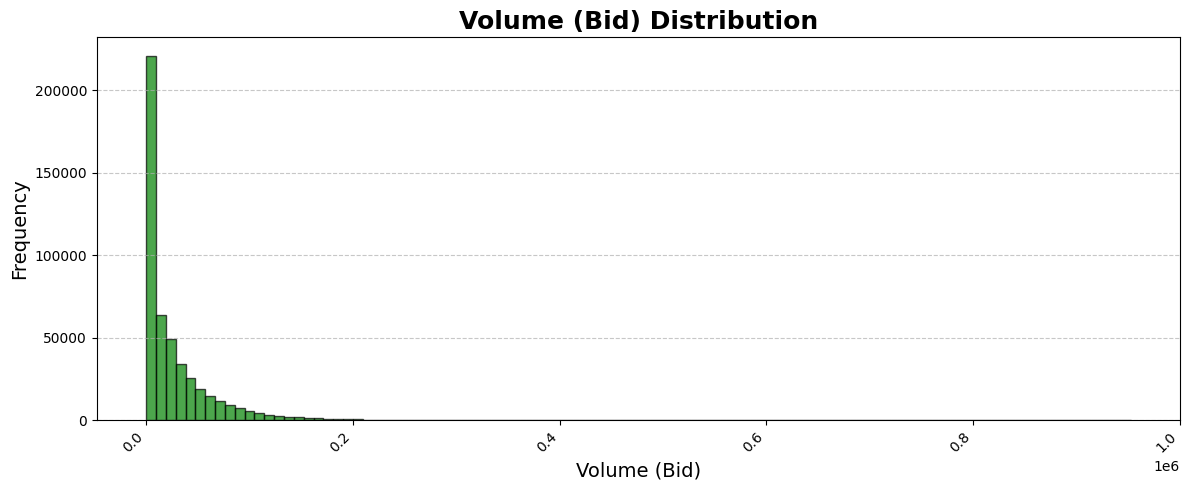

In [36]:

plt.figure(num=1, figsize=(12, 5))
plt.hist(data['Volume_Bid'], bins=100, color='green', edgecolor='black', alpha=0.7)
plt.title('Volume (Bid) Distribution', size=18, fontweight='bold')
plt.ylabel('Frequency', size=14)
plt.xlabel('Volume (Bid)', size=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [37]:
data

,Open_Bid,High_Bid,Low_Bid,Close_Bid,Volume_Bid,Volume_Ask,Volume_Delta,Volume_Delta_abs,Open_Delta,High_Delta,Low_Delta,Close_Delta,Y_High_Bid,Y_Low_Ask
0,2062.688,2062.688,2062.688,2062.688,0.0000,0.0000,0.0000,0.0000,0.424,0.424,0.424,0.424,2062.688,2063.112
1,2062.688,2062.688,2062.688,2062.688,0.0000,0.0000,0.0000,0.0000,0.424,0.424,0.424,0.424,2062.688,2063.112
2,2062.688,2062.688,2062.688,2062.688,0.0000,0.0000,0.0000,0.0000,0.424,0.424,0.424,0.424,2062.688,2063.112
3,2062.688,2062.688,2062.688,2062.688,0.0000,0.0000,0.0000,0.0000,0.424,0.424,0.424,0.424,2062.688,2063.112
4,2062.688,2062.688,2062.688,2062.688,0.0000,0.0000,0.0000,0.0000,0.424,0.424,0.424,0.424,2062.688,2063.112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482515,2746.315,2746.355,2746.245,2746.325,4800.0002,17670.0000,12869.9998,12869.9998,0.380,0.430,0.410,0.420,2746.355,2746.655
482516,2746.325,2746.455,2746.165,2746.165,9390.0003,32430.0006,23040.0003,23040.0003,0.390,0.400,0.380,0.380,2746.455,2746.545
482517,2746.135,2746.145,2745.905,2746.135,8940.0001,30060.0007,21120.0006,21120.0006,0.350,0.430,0.370,0.420,2746.145,2746.275
482518,2746.155,2746.645,2746.125,2746.645,10649.9996,34860.0000,24210.0004,24210.0004,0.400,0.460,0.420,0.400,2746.645,2746.545


<html> <h2 style="font-style:italic; color:blue;"> Data Normalisation </h2> </html>

##### Train / Validation / Test Split
- ~80% for training
- ~10% for validation
- ~10% for testing

In [38]:
data_length = len(data)
data_length

482520

In [39]:
train_size = int(round(data_length * 0.8, -3))
train_size

386000

In [40]:
train = data.iloc[:train_size]
train.shape

(386000, 14)

<html> <h4 style="font-style:italic; color:blue;"> Find Max and Min for Prices, Volumes and Deltas </h4> </html>

In [41]:

Max_price_is_Max_High_Ask = data['High_Bid'].max() + data['High_Delta'].max()
Min_price_is_Min_Low_Bid = 0
Max_Volume = max(data['Volume_Bid'].max(), data['Volume_Ask'].max())
Min_Volume = 0
Max_Delta = max(data['Open_Delta'].max(), data['High_Delta'].max(), data['Low_Delta'].max(), data['Close_Delta'].max())
Min_Delta = min(data['Open_Delta'].min(), data['High_Delta'].min(), data['Low_Delta'].min(), data['Close_Delta'].min())

In [42]:
max_price = (train['High_Bid'] + train['High_Delta']).max()
max_price

2762.485

In [43]:
min_price = train['Low_Bid'].min()
min_price

1984.088

In [44]:
max_volume = max(max(train['Volume_Bid']),max(train['Volume_Ask']))
max_volume

1375509.977

In [45]:
max_Delta = max(max(train['Open_Delta']), max(train['High_Delta']), max(train['Low_Delta']), max(train['Close_Delta']))
max_Delta = round(max_Delta, 3)
max_Delta

5.981

In [46]:
min_Delta = min(min(train['Open_Delta']), min(train['High_Delta']), min(train['Low_Delta']), min(train['Close_Delta']))
min_Delta = round(min_Delta, 3)
min_Delta

0.001

In [47]:
max_volume_Delta = train['Volume_Delta'].max()
max_volume_Delta

1342749.9753

In [48]:
min_volume_Delta = train['Volume_Delta'].min()
min_volume_Delta

-352360.00639999995

In [49]:
max_volume_Delta_abs = train['Volume_Delta_abs'].max()
max_volume_Delta_abs

1342749.9753

In [50]:
min_volume_Delta_abs = train['Volume_Delta_abs'].min()
min_volume_Delta_abs

0.0

In [51]:
data['Open_Bid'] = ( data['Open_Bid'] - min_price ) / (max_price-min_price)
data['High_Bid']  = ( data['High_Bid']  - min_price ) / (max_price-min_price)
data['Low_Bid']   = ( data['Low_Bid']   - min_price ) / (max_price-min_price)
data['Close_Bid'] = ( data['Close_Bid'] - min_price ) / (max_price-min_price)
data['Y_High_Bid'] = ( data['Y_High_Bid'] - min_price ) / (max_price-min_price)
data['Y_Low_Ask']  = ( data['Y_Low_Ask']  - min_price ) / (max_price-min_price)


In [52]:
data['Volume_Ask']  = data['Volume_Ask'] / max_volume
data['Volume_Bid']  = data['Volume_Bid'] / max_volume

In [53]:
data['Volume_Delta'] = ( data['Volume_Delta'] - min_volume_Delta ) / (max_volume_Delta-min_volume_Delta)

In [54]:
data['Volume_Delta_abs']  = data['Volume_Delta_abs'] / max_volume_Delta_abs

In [55]:
data['Open_Delta']  = ( max_Delta - data['Open_Delta'] )  / (max_Delta-min_Delta)
data['High_Delta']  = ( max_Delta - data['High_Delta'] )  / (max_Delta-min_Delta)
data['Low_Delta']   = ( max_Delta - data['Low_Delta'] )   / (max_Delta-min_Delta)
data['Close_Delta'] = ( max_Delta - data['Close_Delta'] ) / (max_Delta-min_Delta)

In [56]:
data.head()

,Open_Bid,High_Bid,Low_Bid,Close_Bid,Volume_Bid,Volume_Ask,Volume_Delta,Volume_Delta_abs,Open_Delta,High_Delta,Low_Delta,Close_Delta,Y_High_Bid,Y_Low_Ask
0,0.100977,0.100977,0.100977,0.100977,0.0,0.0,0.207869,0.0,0.929264,0.929264,0.929264,0.929264,0.100977,0.101521
1,0.100977,0.100977,0.100977,0.100977,0.0,0.0,0.207869,0.0,0.929264,0.929264,0.929264,0.929264,0.100977,0.101521
2,0.100977,0.100977,0.100977,0.100977,0.0,0.0,0.207869,0.0,0.929264,0.929264,0.929264,0.929264,0.100977,0.101521
3,0.100977,0.100977,0.100977,0.100977,0.0,0.0,0.207869,0.0,0.929264,0.929264,0.929264,0.929264,0.100977,0.101521
4,0.100977,0.100977,0.100977,0.100977,0.0,0.0,0.207869,0.0,0.929264,0.929264,0.929264,0.929264,0.100977,0.101521


In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 482520 entries, 0 to 482519
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Open_Bid          482520 non-null  float64
 1   High_Bid          482520 non-null  float64
 2   Low_Bid           482520 non-null  float64
 3   Close_Bid         482520 non-null  float64
 4   Volume_Bid        482520 non-null  float64
 5   Volume_Ask        482520 non-null  float64
 6   Volume_Delta      482520 non-null  float64
 7   Volume_Delta_abs  482520 non-null  float64
 8   Open_Delta        482520 non-null  float64
 9   High_Delta        482520 non-null  float64
 10  Low_Delta         482520 non-null  float64
 11  Close_Delta       482520 non-null  float64
 12  Y_High_Bid        482520 non-null  float64
 13  Y_Low_Ask         482520 non-null  float64
dtypes: float64(14)
memory usage: 51.5 MB


In [58]:
np.random.seed(19)

In [59]:
n=data.shape[0]
n

482520

In [60]:
p=data.shape[1]
p

14

In [61]:
#  new thingsd sytart
df_2023

[]

<html> <h3 style="font-style:italic; color:blue;">Separate
matrix </h3> </html>

In [62]:
#create the input dataframe
data_ax = data.drop(['Y_High_Bid', 'Y_Low_Ask'], axis=1)

In [63]:
if 'Y_High_Bid' in data.columns and 'Y_Low_Ask' in data.columns:
    data_ax = data.drop(['Y_High_Bid', 'Y_Low_Ask'], axis=1)
else:
    print("Columns 'Y_High_Bid' and/or 'Y_Low_Ask' not found in the DataFrame.")

    data_ax = data

In [64]:
# data_ax.info()

In [65]:
#create the input dataframe
data_ay = data[['Y_High_Bid', 'Y_Low_Ask']]

In [66]:
data_ay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 482520 entries, 0 to 482519
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Y_High_Bid  482520 non-null  float64
 1   Y_Low_Ask   482520 non-null  float64
dtypes: float64(2)
memory usage: 7.4 MB


In [67]:
#we shift by 5-minutes(one-row) up
data_ay = data_ay.shift(-1)

In [68]:
data_ay

,Y_High_Bid,Y_Low_Ask
0,0.100977,0.101521
1,0.100977,0.101521
2,0.100977,0.101521
3,0.100977,0.101521
4,0.100977,0.101521
...,...,...
482515,0.979406,0.979522
482516,0.979008,0.979175
482517,0.979650,0.979522
482518,0.979702,0.980049


In [69]:
# delete the last 5 rows
data_ay = data_ay.iloc[:-1]
data_ax = data_ax.iloc[:-1]

In [70]:
data_ay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 482519 entries, 0 to 482518
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Y_High_Bid  482519 non-null  float64
 1   Y_Low_Ask   482519 non-null  float64
dtypes: float64(2)
memory usage: 7.4 MB


In [71]:
data_ay.shape

(482519, 2)

In [72]:
data_ax.shape

(482519, 12)

In [73]:
# Create inputs Numpy

data_a = np.array(data_ax)

with np.printoptions(precision=4):
    print("data_a:")
    print(data_a[:2,:])
    print('\n')
    print(data_a[-2:,:])

print("numpy size: = ", data_a.shape)
print("type: ", data_a.dtype)


data_a:
[[0.101  0.101  0.101  0.101  0.     0.     0.2079 0.     0.9293 0.9293
  0.9293 0.9293]
 [0.101  0.101  0.101  0.101  0.     0.     0.2079 0.     0.9293 0.9293
  0.9293 0.9293]]


[[0.979  0.979  0.9787 0.979  0.0065 0.0219 0.2203 0.0157 0.9416 0.9283
  0.9383 0.9299]
 [0.979  0.9797 0.979  0.9797 0.0077 0.0253 0.2222 0.018  0.9333 0.9232
  0.9299 0.9333]]
numpy size: =  (482519, 12)
type:  float64


In [74]:
# Create outputs Numpy

data_y = np.array(data_ay)

print("data_a:")
print(data_y[:3,:])
print('\n')
print(data_y[-3:,:])

print("numpy size: = ", data_y.shape)
print("type: ", data_y.dtype)

data_a:
[[0.10097675 0.10152146]
 [0.10097675 0.10152146]
 [0.10097675 0.10152146]]


[[0.97900814 0.97917515]
 [0.97965049 0.97952202]
 [0.97970187 0.98004874]]
numpy size: =  (482519, 2)
type:  float64


<html> <h3 style="font-style:italic; color:blue;">3D inputs tensor, and 2D outputs matrix </h3> </html>

In [75]:
from tqdm import tqdm

In [76]:
n_small = 30000
N=50

L=n_small-N
t=data_a.shape[1]
print('Size of a three-dimensional inputs tensor: ',L,N,t)

Size of a three-dimensional inputs tensor:  29950 50 12


In [77]:


data_b = np.zeros( (L, N, t), dtype= 'float32' )

In [78]:


Y = np.zeros((L, 2), dtype= 'float32')

In [79]:


print('L = n_small - N - 5 = ', n_small-N-5, L)

for k in tqdm(range(L)):
    data_b[k, :, :] = data_a[k:k+N, :]

    Y[k,0] = data_y[k+N-1,0]
    Y[k,1] = data_y[k+N-1,1]

print(k)

print('data_b:', '\n', data_b)
print("Numpy size:        ", data_b.shape, '\n')

print( Y[:5,:])
print( Y[-10:,:])
print(      "Numpy size:         ", Y.shape)

L = n_small - N - 5 =  29945 29950


100%|██████████| 29950/29950 [00:00<00:00, 208694.37it/s]

29949
data_b: 
 [[[0.10097675 0.10097675 0.10097675 ... 0.9292642  0.9292642  0.9292642 ]
  [0.10097675 0.10097675 0.10097675 ... 0.9292642  0.9292642  0.9292642 ]
  [0.10097675 0.10097675 0.10097675 ... 0.9292642  0.9292642  0.9292642 ]
  ...
  [0.10097675 0.10097675 0.10097675 ... 0.9292642  0.9292642  0.9292642 ]
  [0.10097675 0.10097675 0.10097675 ... 0.9292642  0.9292642  0.9292642 ]
  [0.10097675 0.10097675 0.10097675 ... 0.9292642  0.9292642  0.9292642 ]]

 [[0.10097675 0.10097675 0.10097675 ... 0.9292642  0.9292642  0.9292642 ]
  [0.10097675 0.10097675 0.10097675 ... 0.9292642  0.9292642  0.9292642 ]
  [0.10097675 0.10097675 0.10097675 ... 0.9292642  0.9292642  0.9292642 ]
  ...
  [0.10097675 0.10097675 0.10097675 ... 0.9292642  0.9292642  0.9292642 ]
  [0.10097675 0.10097675 0.10097675 ... 0.9292642  0.9292642  0.9292642 ]
  [0.10097675 0.10097675 0.10097675 ... 0.9292642  0.9292642  0.9292642 ]]

 [[0.10097675 0.10097675 0.10097675 ... 0.9292642  0.9292642  0.9292642 ]
  [0.1

In [80]:

import random

pp = random.randint(50, L)
print('random int = ', pp)

print('data_b:', '\t\t','Y:')
print('Y_High_Bid ','\t\t','Y_High_Bid')

for i in range(15):
    print(data_b[pp+i,N-1,1], '\t\t', Y[pp+i,0])

random int =  2833
data_b: 		 Y:
Y_High_Bid  		 Y_High_Bid
0.076229736 		 0.07610127
0.07610127 		 0.07563878
0.07563878 		 0.07593426
0.07593426 		 0.07593426
0.07593426 		 0.07606273
0.07606273 		 0.076422445
0.076422445 		 0.07640959
0.07640959 		 0.07628112
0.07628112 		 0.07648668
0.07648668 		 0.0763839
0.0763839 		 0.07646098
0.07646098 		 0.07671792
0.07671792 		 0.07671792
0.07671792 		 0.07687209
0.07687209 		 0.07668324


In [81]:
#clean memory
data = []
data_ax = []
data_ay = []
data_a = []
data_y = []

<html> <h3 style="font-style:italic; color:blue;"> Create and train neural network </h3> </html>

In [82]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_b, Y, test_size=0.1, shuffle = False, stratify = None, random_state=101)

In [83]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = np.zeros_like(X_train, dtype=np.float64)
X_test_scaled = np.zeros_like(X_test, dtype=np.float64)

for i in range(X_train.shape[1]):
    X_train_scaled[:, i, :] = scaler.fit_transform(X_train[:, i, :])
    X_test_scaled[:, i, :] = scaler.transform(X_test[:, i, :])

In [84]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(26955, 50, 12)
(26955, 2)
(2995, 50, 12)
(2995, 2)


<html> <h3 style="color:blue;"> LSTM </h3> </html>

In [85]:
model = keras.Sequential([
    keras.layers.LSTM(100, activation='relu', input_shape=(50, 12)),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(25, activation='relu'),
    keras.layers.Dense(2)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [86]:
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100)                 │          45,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 25)                  │           1,275 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │              52 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 51,577 (201.47 KB)

 Trainable params: 51,577 (201.47 KB)

 Non-trainable params: 0 (0.00 B)

None


<html> <h3 style="font-style:italic; color:blue;"> Callbacks </h3> </html>

In [87]:
model.compile(optimizer="adam", loss="mse", metrics=["mae"])

In [88]:
# Early Stopping parameters

es = EarlyStopping(monitor='val_loss', mode='min', patience=5, verbose=1)
mc = ModelCheckpoint('best_model_LSTM_GOLD.keras', monitor='val_loss', mode='min', verbose=1, save_best_only=True)

In [89]:
history = model.fit(X_train, y_train, batch_size=20, epochs=20, validation_split=0.1, shuffle=True, verbose=1, callbacks=[es, mc])

Epoch 1/20
1213/1213 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0083 - mae: 0.0256
Epoch 1: val_loss improved from inf to 0.00003, saving model to best_model_LSTM_GOLD.keras
1213/1213 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - loss: 0.0083 - mae: 0.0255 - val_loss: 2.8374e-05 - val_mae: 0.0033
Epoch 2/20
1210/1213 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.6012e-04 - mae: 0.0044
Epoch 2: val_loss improved from 0.00003 to 0.00003, saving model to best_model_LSTM_GOLD.keras
1213/1213 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - loss: 1.6002e-04 - mae: 0.0044 - val_loss: 2.7118e-05 - val_mae: 0.0034
Epoch 3/20
1208/1213 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6.9703e-05 - mae: 0.0032
Epoch 3: val_loss improved from 0.00003 to 0.00002, saving model to best_model_LSTM_GOLD.keras
1213/1213 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - loss: 6.9961e-05 - mae: 0.0032 - val_loss: 1.7871e-05 - val_mae: 0.0018
Epoch 4/20
1207/1213 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8.2649e-05 - mae: 0.0027
Epoch 4: val_loss improved

In [90]:
LSTM_saved_best_model = keras.models.load_model('best_model_LSTM_GOLD.keras')

<html> <h3 style="font-style:italic; color:blue;"> Test </h3> </html>

In [91]:
scores = LSTM_saved_best_model.evaluate(X_test, y_test, verbose=1)

94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.4603e-05 - mae: 9.5637e-04


In [92]:
scores

[2.059827238554135e-05, 0.0009462983580306172]

In [93]:
print("Mean squared error: %.9f " % (scores[0]))

Mean squared error: 0.000020598 


In [94]:
print("Mean absolute error : %.9f " % (scores[1]))

Mean absolute error : 0.000946298 


<html> <h2 style="font-style:italic; color:blue;"> Visualisation </h2> </html>

<html> <h3 style="font-style:italic; color:blue;"> MSE training graphs </h3> </html>

Text(0.5, 0, 'Mean Squared Error')

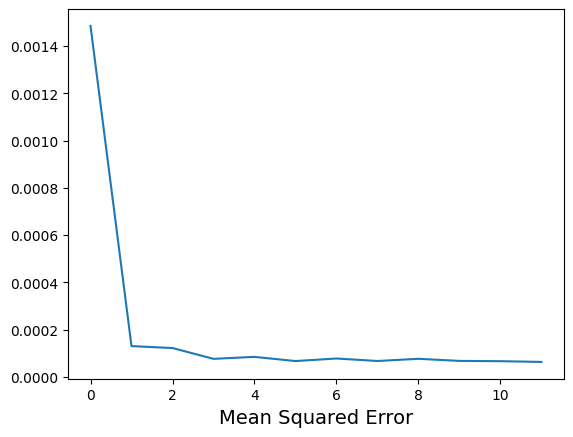

In [95]:
plt.plot(history.history['loss'])
plt.xlabel('Mean Squared Error', size=14)

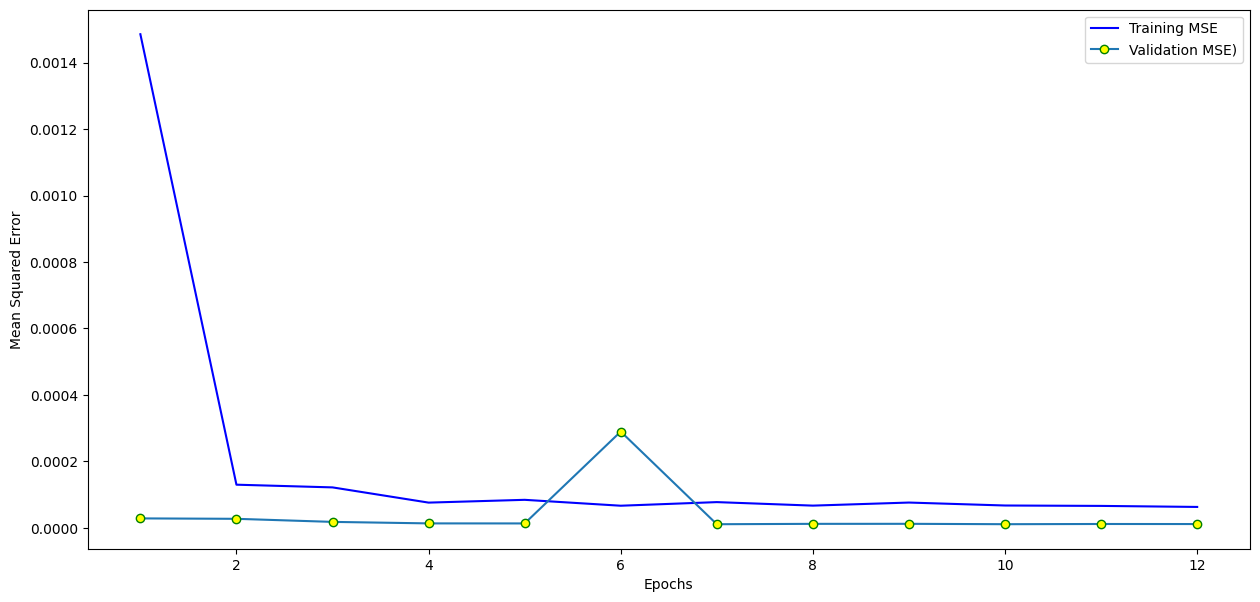

In [96]:
# More detailed MSE graph

history_dict = history.history

mse_values = history_dict['loss']
val_mse_values = history_dict['val_loss']

epochs = range(1, len(mse_values) + 1)
plt.figure(num=1, figsize=(15,7))
plt.plot(epochs, mse_values, 'b', label='Training MSE')
plt.plot(epochs, val_mse_values, marker='o', markeredgecolor='green', markerfacecolor='yellow', label='Validation MSE)')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

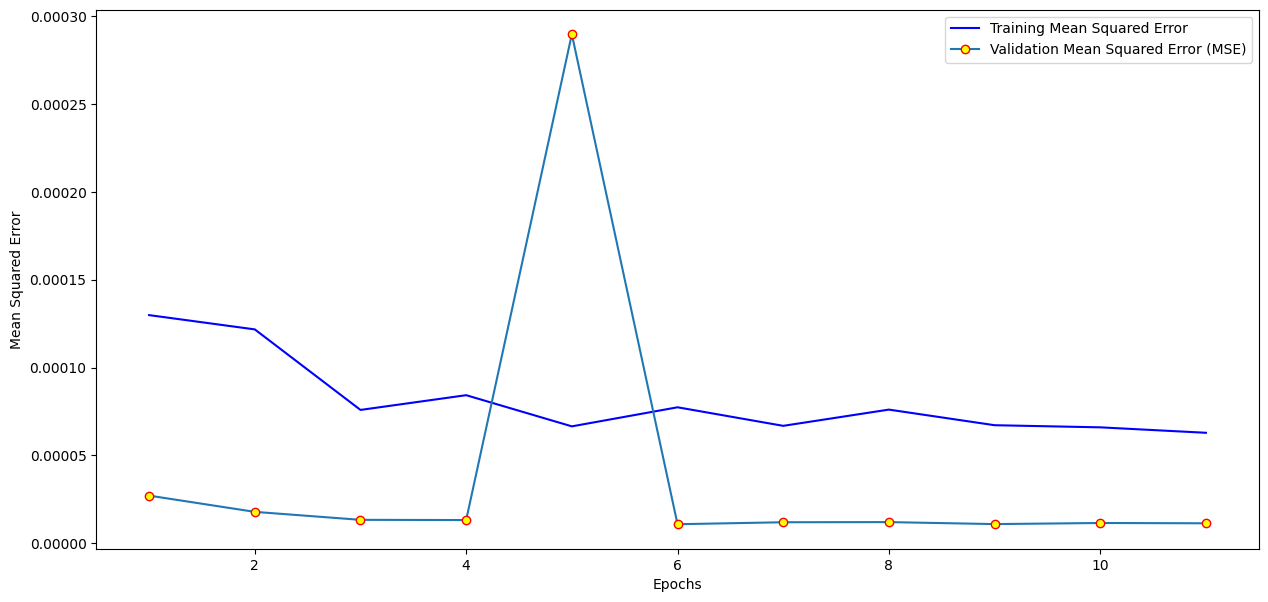

In [97]:
# deleted the 1st epoch
# to examine in detail the results of the remaining epochs

history_dict = history.history

mse_values = history_dict['loss'][1:]
val_mse_values = history_dict['val_loss'][1:]

epochs = range(1, len(mse_values) + 1)
plt.figure(num=1, figsize=(15,7))
plt.plot(epochs, mse_values, 'b', label='Training Mean Squared Error')
plt.plot(epochs, val_mse_values, marker='o', markeredgecolor='red', markerfacecolor='yellow', label='Validation Mean Squared Error (MSE)')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

<html> <h3 style="font-style:italic; color:blue;"> MAE training graphs </h3> </html>

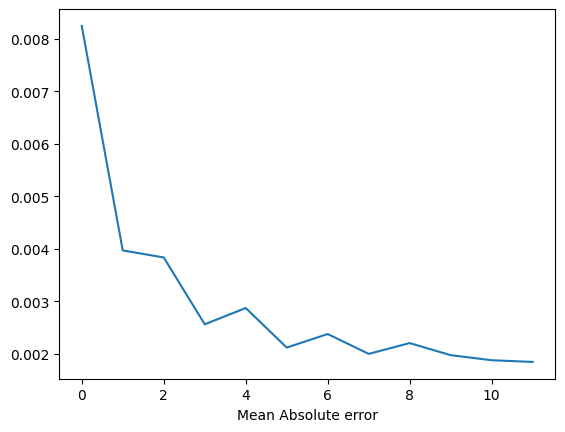

In [98]:
plt.plot(history.history['mae'])
plt.xlabel('Mean Absolute error')
plt.show()

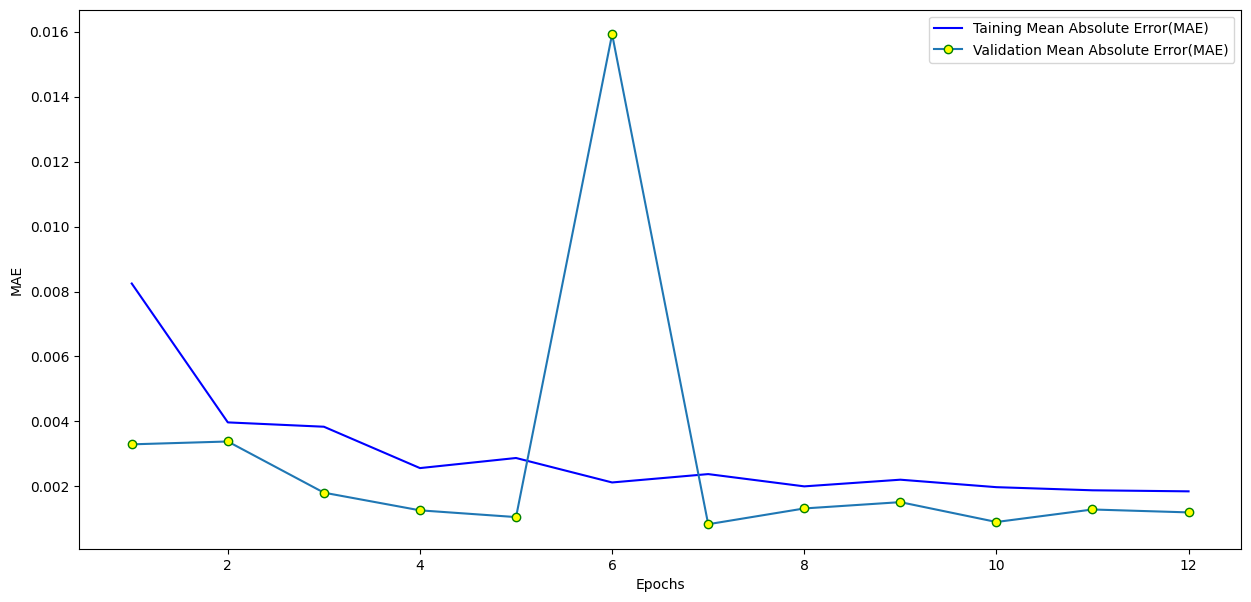

In [99]:
history_dict = history.history

mae_values = history_dict['mae']
val_mae_values = history_dict['val_mae']

epochs = range(1, len(mae_values) + 1)
plt.figure(num=1, figsize=(15,7))
plt.plot(epochs, mae_values, 'b', label='Taining Mean Absolute Error(MAE)')
plt.plot(epochs, val_mae_values, marker='o', markeredgecolor='green', markerfacecolor='yellow', label='Validation Mean Absolute Error(MAE)')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

In [100]:
# mlp model

In [101]:

X_train, X_temp, y_train, y_temp = train_test_split(data_b, Y, test_size=0.2, shuffle=False, random_state=101)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, shuffle=False, random_state=101)


X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_val_flat = X_val.reshape(X_val.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)


model_mlp = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(X_train_flat.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(2)
])


model_mlp.compile(optimizer='adam', loss='mse', metrics=['mae'])


es_mlp = EarlyStopping(monitor='val_loss', mode='min', patience=5, verbose=1)
mc_mlp = ModelCheckpoint('best_model_mlp.keras', monitor='val_loss', mode='min', verbose=1, save_best_only=True)



/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [102]:

history_mlp = model_mlp.fit(X_train_flat, y_train,
                            epochs=20,
                            batch_size=20,
                            validation_data=(X_val_flat, y_val),
                            callbacks=[es_mlp, mc_mlp],
                            verbose=1)


best_model_mlp = keras.models.load_model('best_model_mlp.keras')


loss_mlp, mae_mlp = best_model_mlp.evaluate(X_test_flat, y_test, verbose=0)
print(f"MLP Test Loss (MSE): {loss_mlp:.4f}")
print(f"MLP Test MAE: {mae_mlp:.4f}")




Epoch 1/20
1198/1198 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0062 - mae: 0.0331
Epoch 1: val_loss improved from inf to 0.00007, saving model to best_model_mlp.keras
1198/1198 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0062 - mae: 0.0331 - val_loss: 6.5364e-05 - val_mae: 0.0044
Epoch 2/20
1198/1198 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.2668e-04 - mae: 0.0096
Epoch 2: val_loss improved from 0.00007 to 0.00005, saving model to best_model_mlp.keras
1198/1198 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 4.2664e-04 - mae: 0.0096 - val_loss: 4.9476e-05 - val_mae: 0.0039
Epoch 3/20
1170/1198 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3868e-04 - mae: 0.0077
Epoch 3: val_loss improved from 0.00005 to 0.00004, saving model to best_model_mlp.keras
1198/1198 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.4002e-04 - mae: 0.0077 - val_loss: 4.3610e-05 - val_mae: 0.0043
Epoch 4/20
1169/1198 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4737e-04 - mae: 0.0058
Epoch 4: val_loss did not improve from 0.00004

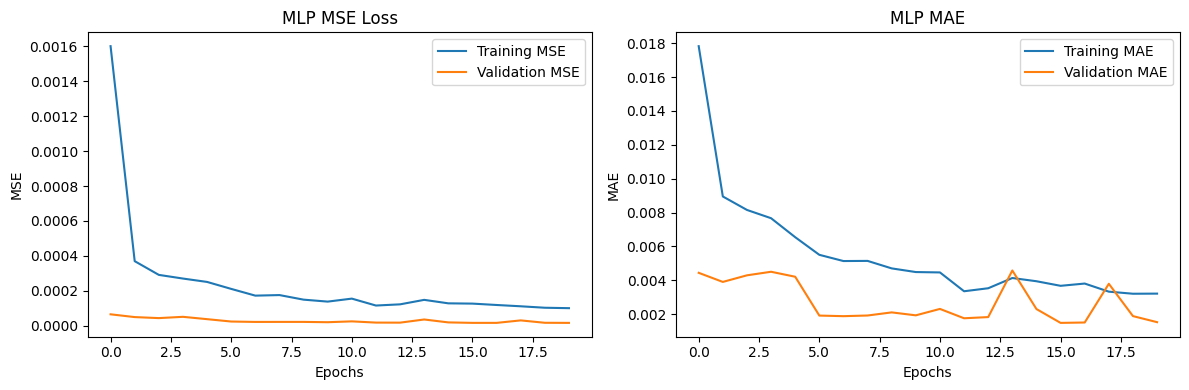

In [103]:

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history_mlp.history['loss'], label='Training MSE')
plt.plot(history_mlp.history['val_loss'], label='Validation MSE')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.title('MLP MSE Loss')

plt.subplot(1, 2, 2)
plt.plot(history_mlp.history['mae'], label='Training MAE')
plt.plot(history_mlp.history['val_mae'], label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.title('MLP MAE')

plt.tight_layout()
plt.show()

In [104]:
# cnn model

In [105]:

X_train, X_temp, y_train, y_temp = train_test_split(data_b, Y, test_size=0.2, shuffle=False, random_state=101)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, shuffle=False, random_state=101)

X_train_cnn = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_val_cnn = X_val.reshape(X_val.shape[0], X_val.shape[1], X_val.shape[2], 1)
X_test_cnn = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)




In [106]:
model_cnn = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(X_train_cnn.shape[1], X_train_cnn.shape[2], 1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(2)
])


model_cnn.compile(optimizer='adam', loss='mse', metrics=['mae'])


es_cnn = EarlyStopping(monitor='val_loss', mode='min', patience=5, verbose=1)
mc_cnn = ModelCheckpoint('best_model_cnn.keras', monitor='val_loss', mode='min', verbose=1, save_best_only=True)


history_cnn = model_cnn.fit(X_train_cnn, y_train,
                            epochs=20,
                            batch_size=20,
                            validation_data=(X_val_cnn, y_val),
                            callbacks=[es_cnn, mc_cnn],
                            verbose=1)


best_model_cnn = keras.models.load_model('best_model_cnn.keras')


loss_cnn, mae_cnn = best_model_cnn.evaluate(X_test_cnn, y_test, verbose=0)
print(f"CNN Test Loss (MSE): {loss_cnn:.4f}")
print(f"CNN Test MAE: {mae_cnn:.4f}")

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1187/1198 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0034 - mae: 0.0217
Epoch 1: val_loss improved from inf to 0.00005, saving model to best_model_cnn.keras
1198/1198 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.0034 - mae: 0.0216 - val_loss: 5.4552e-05 - val_mae: 0.0045
Epoch 2/20
1195/1198 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.8009e-04 - mae: 0.0067
Epoch 2: val_loss did not improve from 0.00005
1198/1198 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 2.8028e-04 - mae: 0.0067 - val_loss: 2.9772e-04 - val_mae: 0.0159
Epoch 3/20
1193/1198 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3124e-04 - mae: 0.0052
Epoch 3: val_loss improved from 0.00005 to 0.00004, saving model to best_model_cnn.keras
1198/1198 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.3152e-04 - mae: 0.0052 - val_loss: 3.7927e-05 - val_mae: 0.0030
Epoch 4/20
1174/1198 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.4231e-05 - mae: 0.0046
Epoch 4: val_loss did not improve from 0.00004
1198/1198 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 8

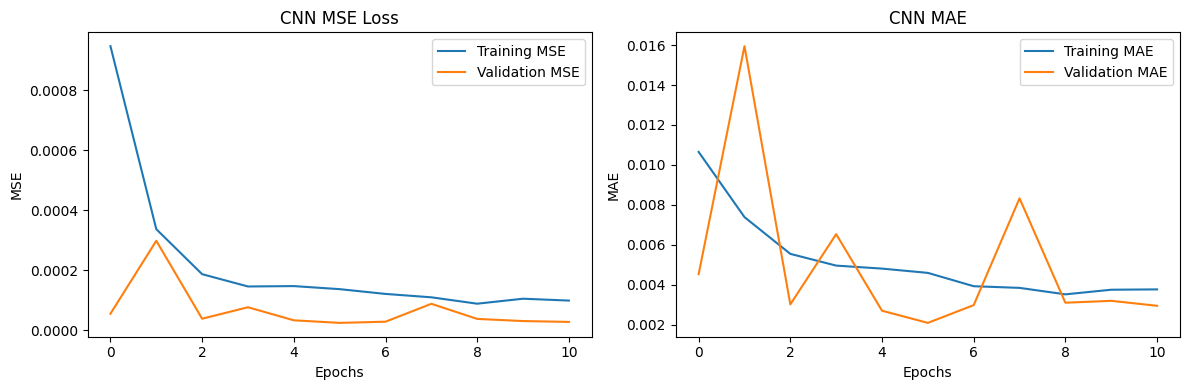

In [107]:

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history_cnn.history['loss'], label='Training MSE')
plt.plot(history_cnn.history['val_loss'], label='Validation MSE')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.title('CNN MSE Loss')

plt.subplot(1, 2, 2)
plt.plot(history_cnn.history['mae'], label='Training MAE')
plt.plot(history_cnn.history['val_mae'], label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.title('CNN MAE')

plt.tight_layout()
plt.show()

In [108]:
# supervised model

In [109]:

X_train, X_temp, y_train, y_temp = train_test_split(data_b, Y, test_size=0.2, shuffle=False, random_state=101)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, shuffle=False, random_state=101)


model = keras.Sequential([
    keras.layers.Flatten(input_shape=(X_train.shape[1], X_train.shape[2])),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(2)
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

es = EarlyStopping(monitor='val_loss', mode='min', patience=5, verbose=1)
mc = ModelCheckpoint('best_model.keras', monitor='val_loss', mode='min', verbose=1, save_best_only=True)

history = model.fit(X_train, y_train,
                    epochs=20,
                    batch_size=32,
                    validation_data=(X_val, y_val),
                    callbacks=[es, mc],
                    verbose=1)

best_model = keras.models.load_model('best_model.keras')

loss, mae = best_model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss (MSE): {loss:.4f}")
print(f"Test MAE: {mae:.4f}")



/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
749/749 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0211 - mae: 0.0371
Epoch 1: val_loss improved from inf to 0.00013, saving model to best_model.keras
749/749 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.0211 - mae: 0.0370 - val_loss: 1.3195e-04 - val_mae: 0.0075
Epoch 2/20
740/749 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.7309e-04 - mae: 0.0097
Epoch 2: val_loss did not improve from 0.00013
749/749 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.7326e-04 - mae: 0.0097 - val_loss: 2.1311e-04 - val_mae: 0.0117
Epoch 3/20
728/749 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.9049e-04 - mae: 0.0093
Epoch 3: val_loss improved from 0.00013 to 0.00006, saving model to best_model.keras
749/749 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.8743e-04 - mae: 0.0092 - val_loss: 6.3558e-05 - val_mae: 0.0056
Epoch 4/20
734/749 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.1136e-04 - mae: 0.0077
Epoch 4: val_loss improved from 0.00006 to 0.00006, saving model to best_model.keras
749/749 ━━━━━━━━━━━━━━━━━

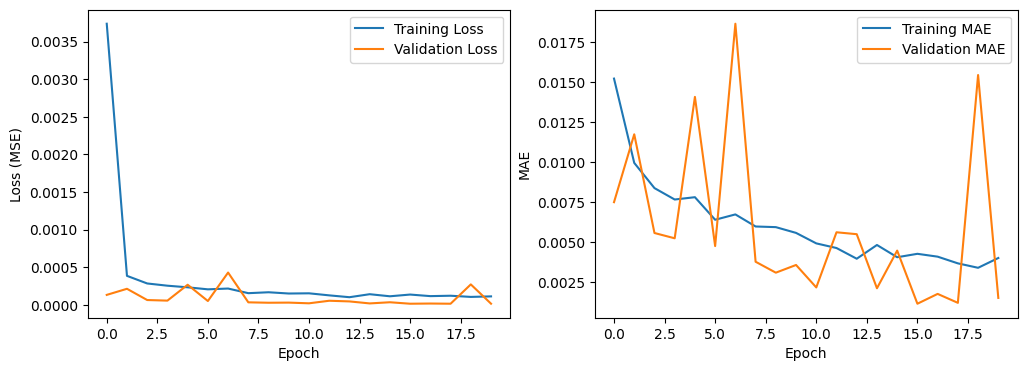

In [110]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()

plt.show()

In [111]:
# random forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(data_b, Y, test_size=0.2, random_state=42)

X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_flat, y_train)

y_pred = rf_model.predict(X_test_flat)


mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")



Mean Squared Error: 7.01543076952588e-06


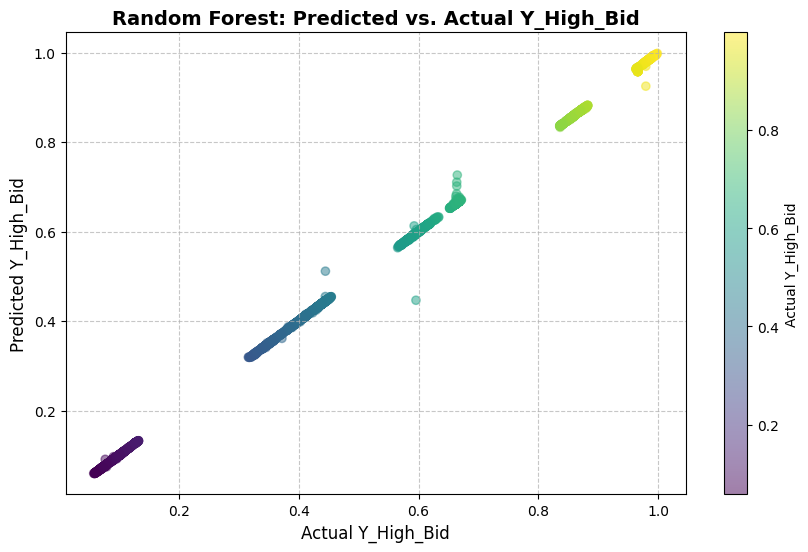

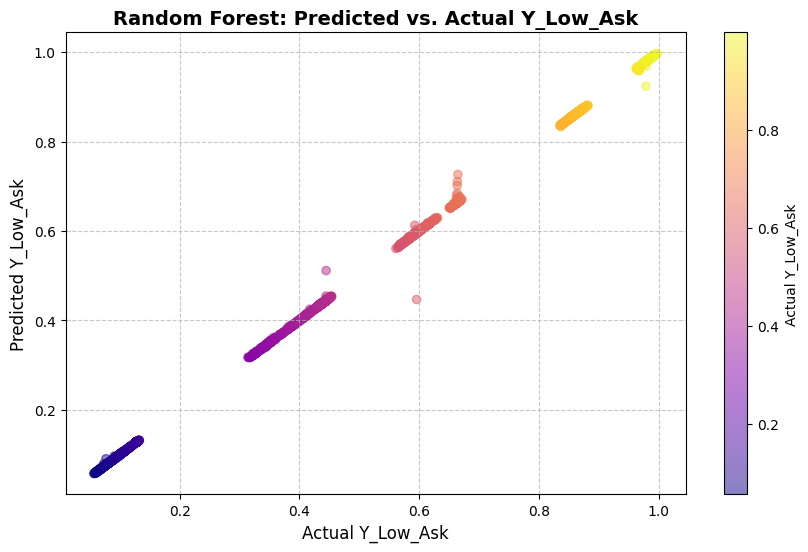

In [112]:

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test[:, 0], y_pred[:, 0], alpha=0.5, c=y_test[:, 0], cmap='viridis')
plt.colorbar(label="Actual Y_High_Bid")
plt.xlabel("Actual Y_High_Bid", fontsize=12)
plt.ylabel("Predicted Y_High_Bid", fontsize=12)
plt.title("Random Forest: Predicted vs. Actual Y_High_Bid", fontsize=14, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(y_test[:, 1], y_pred[:, 1], alpha=0.5, c=y_test[:,1], cmap='plasma')
plt.colorbar(label="Actual Y_Low_Ask")
plt.xlabel("Actual Y_Low_Ask", fontsize=12)
plt.ylabel("Predicted Y_Low_Ask", fontsize=12)
plt.title("Random Forest: Predicted vs. Actual Y_Low_Ask", fontsize=14, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

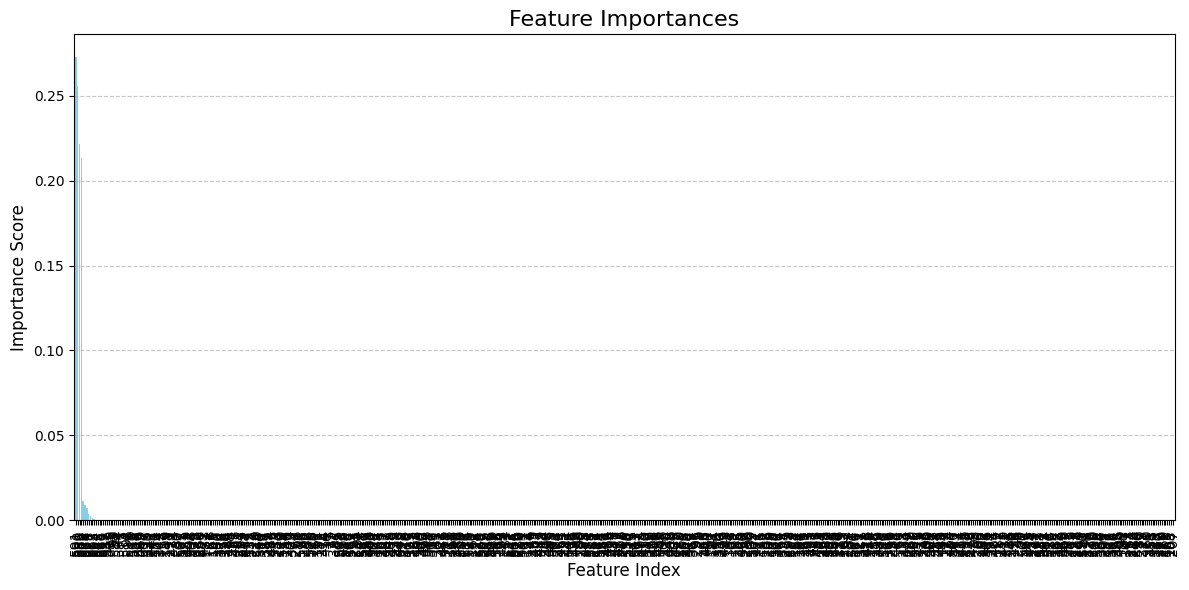

In [113]:
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 6))
plt.title("Feature Importances", fontsize=16)
plt.bar(range(X_train_flat.shape[1]), importances[indices], align="center", color='skyblue')
plt.xticks(range(X_train_flat.shape[1]), indices, rotation=90, fontsize=10)
plt.xlim([-1, X_train_flat.shape[1]])
plt.xlabel("Feature Index", fontsize=12)
plt.ylabel("Importance Score", fontsize=12)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<html> <h3 style="font-style:italic; color:blue;"> Prediction 5 minute ahead </h3> </html>

In [114]:
pred = LSTM_saved_best_model(X_test)
print(pred)

tf.Tensor(
[[0.42449093 0.4237892 ]
 [0.33011702 0.32931817]
 [0.8399713  0.8387721 ]
 ...
 [0.35632846 0.35587636]
 [0.12719566 0.12742724]
 [0.09904589 0.09844152]], shape=(5990, 2), dtype=float32)


<html> <h3 style="font-style:italic; color:blue;"> Sharpe ratio, Sortino ratio
 </h3> </html>

In [129]:

import numpy as np

def sharpe_ratio(returns, risk_free_rate=0.0):

    excess_returns = returns - risk_free_rate
    return np.mean(excess_returns) / np.std(excess_returns)

def sortino_ratio(returns, risk_free_rate=0.0, target_return=0.0):

    downside_returns = returns - target_return
    downside_returns = np.where(downside_returns < 0, downside_returns, 0)
    downside_deviation = np.std(downside_returns)
    excess_returns = returns - risk_free_rate
    if downside_deviation == 0:
      return np.inf
    return np.mean(excess_returns) / downside_deviation


returns = np.diff(pred[:, 0])

sharpe = sharpe_ratio(returns)
print(f"Sharpe Ratio: {sharpe}")

sortino = sortino_ratio(returns)
print(f"Sortino Ratio: {sortino}")

Sharpe Ratio: -0.000143559678690508
Sortino Ratio: -0.0002465038269292563


<html> <h3 style="font-style:italic; color:blue;"> Error Chart </h3> </html>

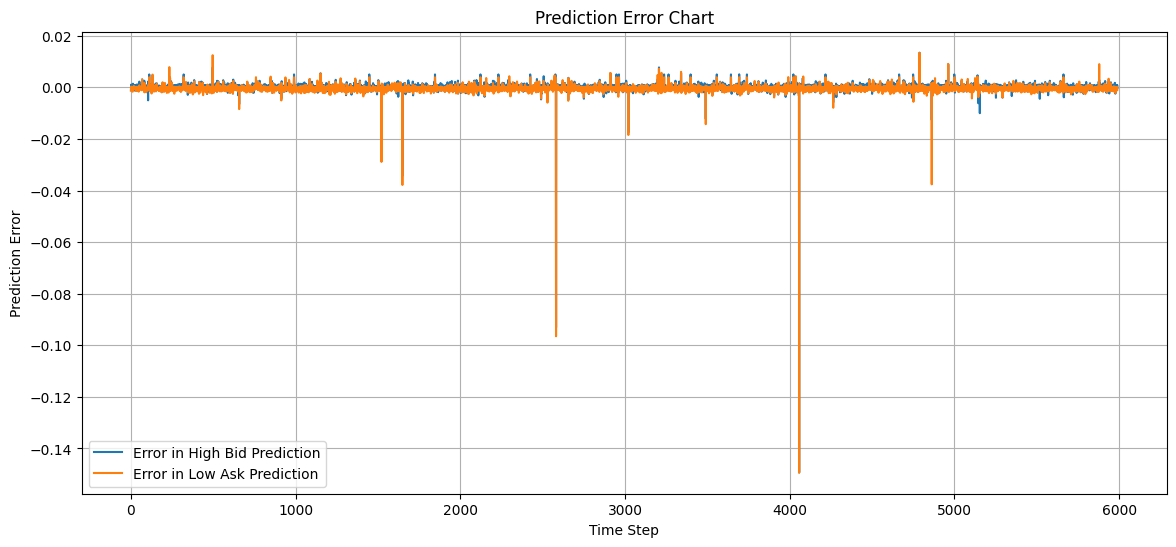

In [115]:

import matplotlib.pyplot as plt

error = pred - y_test

plt.figure(figsize=(14, 6))
plt.plot(error[:, 0], label='Error in High Bid Prediction')
plt.plot(error[:, 1], label='Error in Low Ask Prediction')
plt.xlabel('Time Step')
plt.ylabel('Prediction Error')
plt.title('Prediction Error Chart')
plt.legend()
plt.grid(True)
plt.show()
# day break chart

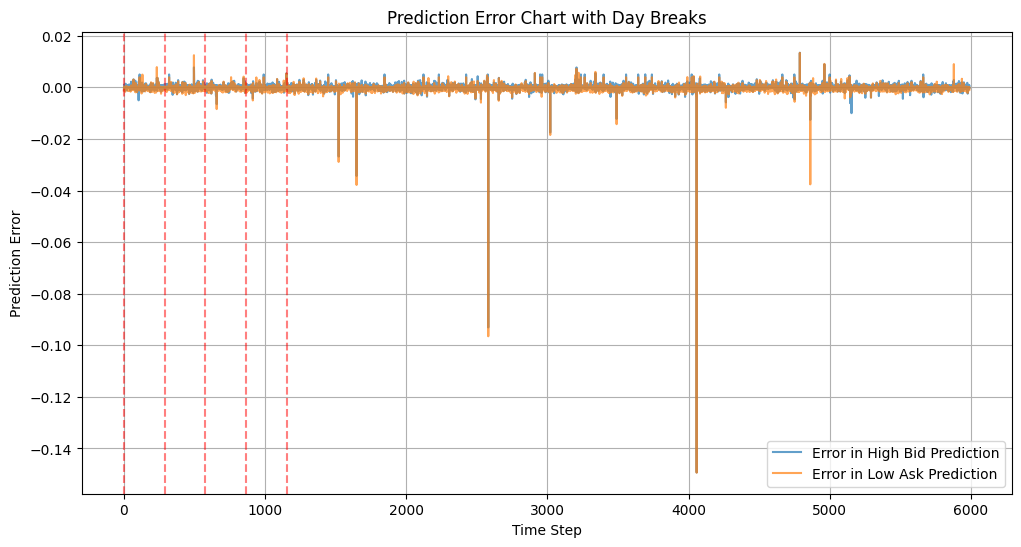

In [116]:

import matplotlib.pyplot as plt
import numpy as np
dates = np.array([0, 288, 576, 864, 1152])


error = pred - y_test
plt.figure(figsize=(12, 6))

plt.plot(error[:, 0], label='Error in High Bid Prediction', alpha=0.7)
plt.plot(error[:, 1], label='Error in Low Ask Prediction', alpha=0.7)

for date in dates:
  plt.axvline(x=date, color='red', linestyle='--', alpha=0.5)

plt.xlabel('Time Step')
plt.ylabel('Prediction Error')
plt.title('Prediction Error Chart with Day Breaks')
plt.legend()
plt.grid(True)
plt.show()

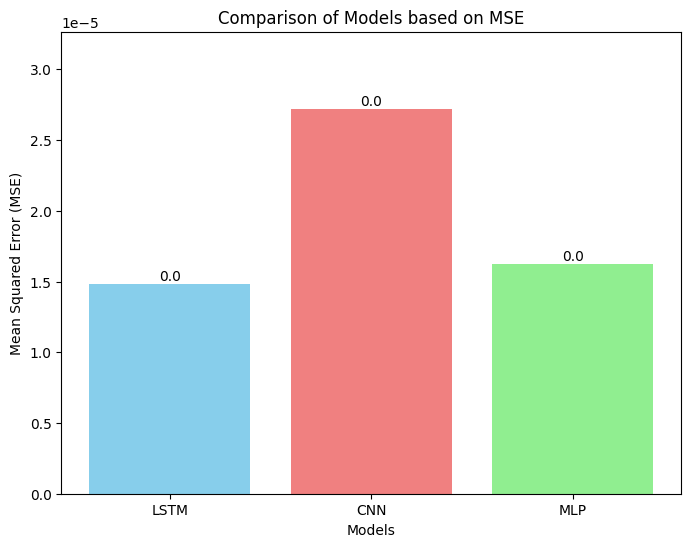

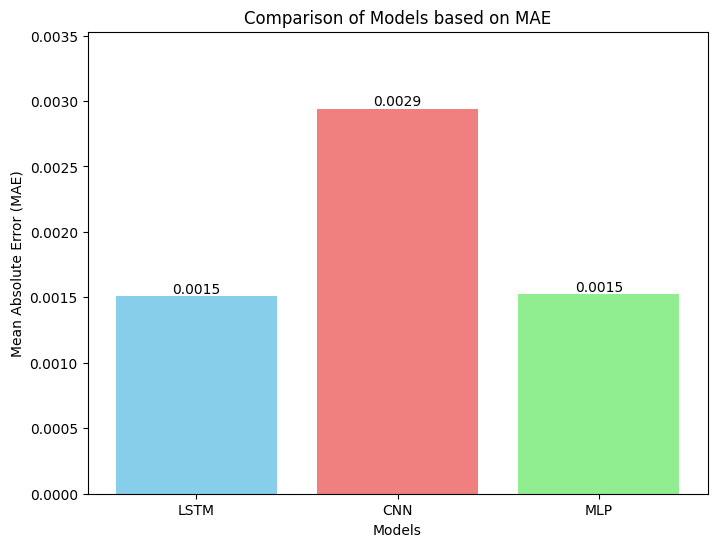

In [117]:
models = ['LSTM', 'CNN', 'MLP']
mse_values = [history.history['val_loss'][-1], history_cnn.history['val_loss'][-1], history_mlp.history['val_loss'][-1]]
mae_values = [history.history['val_mae'][-1], history_cnn.history['val_mae'][-1], history_mlp.history['val_mae'][-1]]

plt.figure(figsize=(8, 6))
plt.bar(models, mse_values, color=['skyblue', 'lightcoral', 'lightgreen'])
plt.xlabel("Models")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Comparison of Models based on MSE")
plt.ylim(0, max(mse_values) * 1.2)

for i, v in enumerate(mse_values):
    plt.text(i, v, str(round(v, 4)), ha='center', va='bottom')

plt.show()


plt.figure(figsize=(8, 6))
plt.bar(models, mae_values, color=['skyblue', 'lightcoral', 'lightgreen'])
plt.xlabel("Models")
plt.ylabel("Mean Absolute Error (MAE)")
plt.title("Comparison of Models based on MAE")
plt.ylim(0, max(mae_values) * 1.2)

for i, v in enumerate(mae_values):
    plt.text(i, v, str(round(v, 4)), ha='center', va='bottom')
plt.show()

In [118]:

import plotly.graph_objects as go

models = ['LSTM', 'CNN', 'MLP']
mse_values = [history.history['val_loss'][-1], history_cnn.history['val_loss'][-1], history_mlp.history['val_loss'][-1]]
mae_values = [history.history['val_mae'][-1], history_cnn.history['val_mae'][-1], history_mlp.history['val_mae'][-1]]

fig = go.Figure()

fig.add_trace(go.Bar(
    x=models,
    y=mse_values,
    name='Mean Squared Error (MSE)',
    marker_color='skyblue'
))

fig.add_trace(go.Bar(
    x=models,
    y=mae_values,
    name='Mean Absolute Error (MAE)',
    marker_color='lightcoral'
))


fig.update_layout(
    title='Comparison of Models based on MSE and MAE',
    xaxis_title="Models",
    yaxis_title="Error Metrics",
    barmode='group',
    legend_title="Error Metric",
    yaxis=dict(range=[0, max(max(mse_values), max(mae_values)) * 1.2]),
    font=dict(size=14),
)

for i, v in enumerate(mse_values):
    fig.add_annotation(x=models[i], y=v, text=str(round(v, 4)), showarrow=False, font=dict(size=12))

for i, v in enumerate(mae_values):
    fig.add_annotation(x=models[i], y=v, text=str(round(v, 4)), showarrow=False, font=dict(size=12))

fig.show()

In [121]:
import plotly.graph_objects as go

models = ['LSTM', 'CNN', 'MLP']
mse_values = [history.history['val_loss'][-1], history_cnn.history['val_loss'][-1], history_mlp.history['val_loss'][-1]]
mae_values = [history.history['val_mae'][-1], history_cnn.history['val_mae'][-1], history_mlp.history['val_mae'][-1]]

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=models,
    y=mse_values,
    mode='lines+markers',
    name='Mean Squared Error (MSE)',
    line=dict(color='royalblue', width=4),
    marker=dict(size=8, color='skyblue', symbol='circle')
))

fig.add_trace(go.Scatter(
    x=models,
    y=mae_values,
    mode='lines+markers',
    name='Mean Absolute Error (MAE)',
    line=dict(color='tomato', width=4),
    marker=dict(size=8, color='lightcoral', symbol='square')
))

fig.update_layout(
    title='Performance Comparison of Models (MSE and MAE)',
    xaxis_title="Models",
    yaxis_title="Error Metrics",
    xaxis=dict(tickmode='array', tickvals=models),
    legend_title="Error Metric",
    font=dict(size=14),
    yaxis=dict(range=[0, max(max(mse_values), max(mae_values)) * 1.2]),
    plot_bgcolor='whitesmoke',
)

for i, v in enumerate(mse_values):
    fig.add_annotation(x=models[i], y=v, text=str(round(v, 4)), showarrow=False, font=dict(size=12), align="center")

for i, v in enumerate(mae_values):
    fig.add_annotation(x=models[i], y=v, text=str(round(v, 4)), showarrow=False, font=dict(size=12), align="center")

fig.show()


In [122]:

from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, f1_score
import numpy as np


def evaluate_model(y_true, y_pred, model_name):

    cm = confusion_matrix(np.argmax(y_true, axis=1), np.argmax(y_pred, axis=1))
    accuracy = accuracy_score(np.argmax(y_true, axis=1), np.argmax(y_pred, axis=1))
    recall = recall_score(np.argmax(y_true, axis=1), np.argmax(y_pred, axis=1), average='weighted')
    f1 = f1_score(np.argmax(y_true, axis=1), np.argmax(y_pred, axis=1), average='weighted')

    print(f"Evaluation for {model_name}:")
    print("Confusion Matrix:\n", cm)
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}\n")

y_pred_lstm = LSTM_saved_best_model.predict(X_test)
y_pred_lstm_classes = np.argmax(y_pred_lstm, axis=1).astype(int)
y_true_classes = np.argmax(y_test, axis=1).astype(int)

evaluate_model(y_test, y_pred_lstm, "LSTM")

y_pred_cnn = best_model_cnn.predict(X_test_cnn)
y_pred_cnn_classes = np.argmax(y_pred_cnn, axis=1).astype(int)
evaluate_model(y_test, y_pred_cnn, "CNN")


y_pred_mlp = best_model_mlp.predict(X_test_flat)
y_pred_mlp_classes = np.argmax(y_pred_mlp, axis=1).astype(int)
evaluate_model(y_test, y_pred_mlp, "MLP")

188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Evaluation for LSTM:
Confusion Matrix:
 [[3168   23]
 [1438 1361]]
Accuracy: 0.7561
Recall: 0.7561
F1 Score: 0.7370

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


ValueError: Found input variables with inconsistent numbers of samples: [5990, 2995]

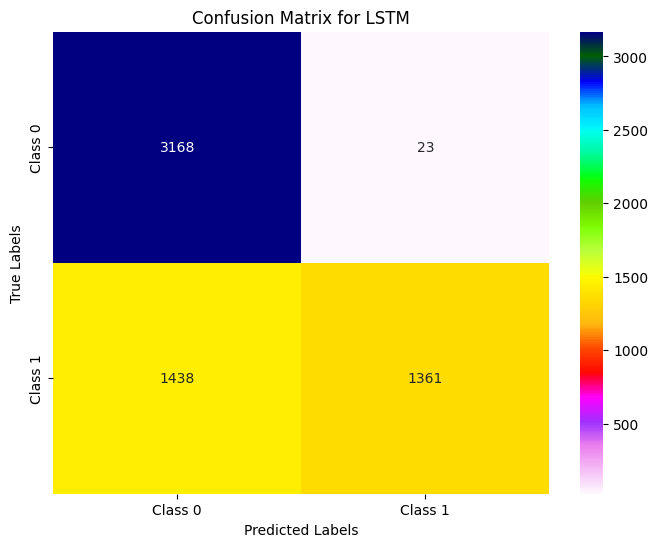

In [123]:

import seaborn as sns

def plot_lstm_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="gist_ncar_r",
                xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title(f"Confusion Matrix for {model_name}")
    plt.show()

plot_lstm_matrix(y_true_classes, y_pred_lstm_classes, "LSTM")


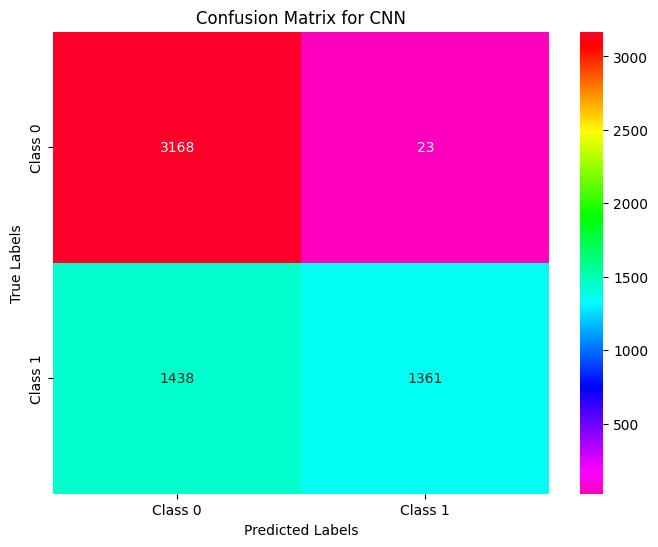

In [124]:

import seaborn as sns

def plot_cnn_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="gist_rainbow_r",
                xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title(f"Confusion Matrix for {model_name}")
    plt.show()

plot_cnn_matrix(y_true_classes, y_pred_lstm_classes, "CNN")

In [125]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="winter",
                xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title(f"Confusion Matrix for {model_name}")
    plt.show()


plot_confusion_matrix(y_true_classes, y_pred_mlp_classes, "MLP")

NameError: name 'y_pred_mlp_classes' is not defined